In [1]:
# Monter Google Drive (demande l'autorisation une fois par notebook)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Installer les dépendances (à adapter selon ton requirements)
!pip install -r /content/drive/MyDrive/pcp/requirements.txt
# Ajouter le dossier pcp dans sys.path pour importer tes modules locaux
import sys
repo_path = '/content/drive/MyDrive/pcp'
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [29]:

import utils_contrib
import importlib
importlib.reload(utils_contrib)


<module 'utils_contrib' from '/content/drive/MyDrive/pcp/utils_contrib.py'>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from utils_contrib import *


y = np.array([1.1, 1.2, 0.2, 0.5])
x = projection_simplexe(y)
print("x =", x, "somme =", x.sum())

x = [0.45 0.55 0.   0.  ] somme = 1.0000000000000002


In [24]:
# Affichage
import numpy as np

# Points d'observation
x = np.array([0.0, 1.0, 2.0, 4.0])
n = len(x)
print(x[:, None] - x[None, :])
# Matrice des distances
dist = np.abs(x[:, None] - x[None, :])
print("Matrice des distances :\n", dist)

# Remplacer la diagonale par inf pour éviter division par zéro
np.fill_diagonal(dist, np.inf)
print("\nDistances avec diagonale = inf :\n", dist)

# Matrice des poids w_ij = 1 / |x_i - x_j|
W = 1 / dist
print("\nMatrice des poids W :\n", W)
W[0][:,None]

[[ 0. -1. -2. -4.]
 [ 1.  0. -1. -3.]
 [ 2.  1.  0. -2.]
 [ 4.  3.  2.  0.]]
Matrice des distances :
 [[0. 1. 2. 4.]
 [1. 0. 1. 3.]
 [2. 1. 0. 2.]
 [4. 3. 2. 0.]]

Distances avec diagonale = inf :
 [[inf  1.  2.  4.]
 [ 1. inf  1.  3.]
 [ 2.  1. inf  2.]
 [ 4.  3.  2. inf]]

Matrice des poids W :
 [[0.         1.         0.5        0.25      ]
 [1.         0.         1.         0.33333333]
 [0.5        1.         0.         0.5       ]
 [0.25       0.33333333 0.5        0.        ]]


array([[0.  ],
       [1.  ],
       [0.5 ],
       [0.25]])

In [72]:
# Supposons qu'on ait des résidus r
y = np.array([1.2, 0.8, 2.0, 1.5])
f_x = np.array([0.9, 1.0, 1.5, 2.0])
r = np.abs(y - f_x)  # résidus

F, mu = generer_F_gaussiennes_residus(r, K=3)

print("Résidus :", r)
print("Moyennes mu :", mu)
print("Matrice F :\n", F)


Résidus : [0.3 0.2 0.5 0.5]
Moyennes mu : [0.2  0.35 0.5 ]
Matrice F :
 [[2.41970725 3.52065327 0.53990967]
 [3.9894228  1.29517596 0.04431848]
 [0.04431848 1.29517596 3.9894228 ]
 [0.04431848 1.29517596 3.9894228 ]]


In [71]:
# Supposons qu'on ait des résidus r
y = np.array([1.2, 0.8, 2.0, 1.5])
f_x = np.array([0.9, 1.0, 1.5, 2.0])
r = np.abs(y - f_x)  # résidus

F, mu = generer_F_gaussiennes_residus_gmm(r, K=3)

print("Résidus :", r)
print("Moyennes mu :", mu)
print("Matrice F :\n", F)

Résidus : [0.3 0.2 0.5 0.5]
Moyennes mu : [0.2 0.5 0.3]
Matrice F :
 [[  0.          0.        398.9422804]
 [398.9422804   0.          0.       ]
 [  0.        398.9422804   0.       ]
 [  0.        398.9422804   0.       ]]


In [76]:
# Exemple
y = np.array([1.2, 0.8, 2.0, 1.5])
f_x = np.array([0.9, 1.0, 1.5, 2.0])
r = np.abs(y - f_x)

F, mu, sigma = generer_F_gaussiennes_auto(r)

print("Résidus :", r)
print("Nombre de clusters K :", len(mu))
print("Moyennes mu :", mu)
print("Sigma choisi :", sigma)
print("Matrice F :\n", F)

Résidus : [0.3 0.2 0.5 0.5]
Nombre de clusters K : 3
Moyennes mu : [0.2  0.35 0.5 ]
Sigma choisi : 0.07500000000000001
Matrice F :
 [[2.18680100e+00 4.25930674e+00 1.51946480e-01]
 [5.31923041e+00 7.19879554e-01 1.78440301e-03]
 [1.78440301e-03 7.19879554e-01 5.31923041e+00]
 [1.78440301e-03 7.19879554e-01 5.31923041e+00]]


In [74]:
from utils_contrib import algo_sousgradient_projete_residus
# Jeu de données factice
np.random.seed(0)
n, d = 10, 5
X = np.random.randn(n, d)  # 10 points avec 5 covariables standardisées
y = np.random.randn(n)     # valeurs observées
f_x = np.random.randn(n)   # prédictions modèle
r = np.abs(y - f_x)                # résidus

# Lancer l'algo
pi_opt, mu, F,_ = algo_sousgradient_projete_residus(r, X, K=3)

print("Résidus :", r)
print("Moyennes mu :", mu)
print("Matrice F (densités sur résidus) :\n", F)
print("Probabilités optimisées π :\n", pi_opt)


Résidus : [0.22300611 0.74645566 0.30234114 0.54565042 0.20560837 0.83011281
 1.69671557 0.16031036 0.27297627 0.41468656]
Moyennes mu : [0.16031036 0.92851296 1.69671557]
Matrice F (densités sur résidus) :
 [[3.27759090e+00 6.20333346e-11 2.75706830e-47]
 [1.38185456e-07 7.60638901e-01 9.83211036e-20]
 [1.45500501e+00 1.22112181e-08 2.40660882e-42]
 [2.37988872e-03 2.61748886e-03 6.76028567e-29]
 [3.60042200e+00 1.79056293e-11 2.09111437e-48]
 [7.22633115e-10 2.45841545e+00 1.96401459e-16]
 [2.19995652e-51 6.11344591e-13 3.98942280e+00]
 [3.98942280e+00 6.11344591e-13 2.19995652e-51]
 [2.11481251e+00 1.85984772e-09 3.84091695e-44]
 [1.56967563e-01 7.37634722e-06 8.14000745e-36]]
Probabilités optimisées π :
 [[0.46628718 0.27145927 0.26225355]
 [0.28825356 0.44975874 0.2619877 ]
 [0.4664612  0.2715279  0.2620109 ]
 [0.37407037 0.36523004 0.2606996 ]
 [0.46641814 0.27142302 0.26215883]
 [0.28558983 0.45273028 0.2616799 ]
 [0.28376324 0.2704819  0.44575486]
 [0.46779928 0.27130581 0.2608

Résidus calibration : [0.20158847 0.61122254 0.10413749 0.48831952 0.1781832  0.35328658
 0.00525001 0.89293525 0.06345605 0.20099468 0.94157535 0.67387953
 0.6352425  0.48469835 0.5865617 ]
Moyennes mu : [0.00525001 0.47341268 0.94157535]
Probabilités calibration π_opt :
 [[0.43292113 0.30041521 0.26666366]
 [0.27553278 0.45620736 0.26825986]
 [0.4410499  0.29132398 0.26762612]
 [0.27546335 0.45662011 0.26791654]
 [0.4421596  0.29120719 0.26663321]
 [0.27526854 0.45792217 0.26680929]
 [0.4417882  0.29142707 0.26678473]
 [0.27483672 0.29137809 0.43378519]
 [0.44612544 0.28754049 0.26633407]
 [0.42630471 0.30693037 0.26676492]
 [0.27454512 0.29156685 0.43388803]
 [0.27430812 0.44241704 0.28327484]
 [0.2747856  0.45619464 0.26901976]
 [0.27429585 0.4590391  0.26666505]
 [0.27402837 0.45913979 0.26683184]]
Probabilités pour le point test π_test :
 [[0.36172613 0.37322477 0.2650491 ]]


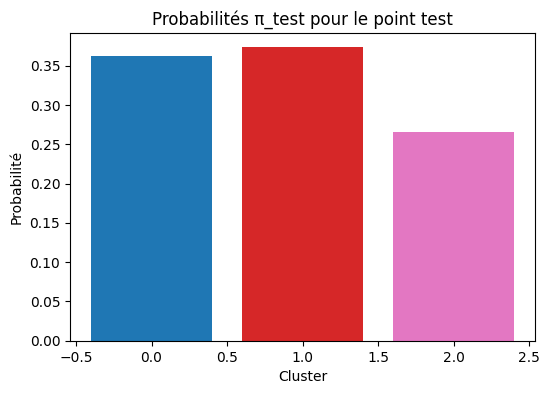

Cluster dominant pour le point test : 1


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from utils_contrib import algo_sousgradient_projete_residus, approx_pi_test


np.random.seed(0)
n, d = 15, 5
X = np.random.randn(n, d)          # points calibration
y = np.random.randn(n)             # valeurs observées
f_x = y + np.random.randn(n)*0.5   # prédictions avec bruit
r = np.abs(y - f_x)                # résidus


K = 3
pi_opt, mu, F, _ = algo_sousgradient_projete_residus(r, X, K=K)


X_test = np.random.randn(1, d)     # un point test
pi_test = approx_pi_test(pi_opt, X, X_test, max_iter=500)

print("Résidus calibration :", r)
print("Moyennes mu :", mu)
print("Probabilités calibration π_opt :\n", pi_opt)
print("Probabilités pour le point test π_test :\n", pi_test)

# ------------------------------
# Visualisation
# ------------------------------
plt.figure(figsize=(6,4))
plt.bar(range(K), pi_test.flatten(), color=plt.cm.tab10(np.arange(K)/K))
plt.xlabel('Cluster')
plt.ylabel('Probabilité')
plt.title('Probabilités π_test pour le point test')
plt.show()

# Si tu veux voir le cluster dominant :
cluster_test = np.argmax(pi_test)
print("Cluster dominant pour le point test :", cluster_test)


In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1) Génération de données brutes
np.random.seed(0)
n, d = 10, 5
X = np.random.rand(n, d) * 100   # covariables non standardisées
beta_true = np.array([1.5, -2.0, 0.5, 0.0, 1.0])  # vrais coefficients
y = X @ beta_true + np.random.randn(n) * 5        # Y = Xβ + bruit

print("Y (réponse observée):", y[:5])

# 2) Standardisation de X pour l'algo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Estimation d’un modèle supervisé (régression linéaire)
model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# 4) Résidus = Y - f(X)
r = np.abs(y - y_pred)

print("\nCoefficients appris β:", model.coef_)
print("Résidus r:", r[:5])


Y (réponse observée): [  3.2564501  102.05335361  45.93734473 135.46755106  15.59847239]

Coefficients appris β: [ 39.27364401 -55.38134241  12.77641651   1.01964527  26.15836679]
Résidus r: [2.46360792 7.53412793 3.24385934 3.82833389 3.38041039]


In [37]:
import numpy as np
from scipy.spatial.distance import cdist

# 4 points en 2D
X = np.array([
    [0.5, 0.25,0.4],
    [0, 1,0.7],
    [1, 0,0.45],
    [1, 1,0.65]
])

# Étape 3 : Matrice des distances
dist = cdist(X, X, metric='euclidean')
np.fill_diagonal(dist, np.inf)  # pour éviter 1/0

# Matrice des poids
W = 1 / dist

print("X =\n", X)
print("\nMatrice des distances :\n", dist)
print("\nMatrice des poids W :\n", W)


X =
 [[0.5  0.25 0.4 ]
 [0.   1.   0.7 ]
 [1.   0.   0.45]
 [1.   1.   0.65]]

Matrice des distances :
 [[       inf 0.95       0.56124861 0.93541435]
 [0.95              inf 1.43614066 1.00124922]
 [0.56124861 1.43614066        inf 1.0198039 ]
 [0.93541435 1.00124922 1.0198039         inf]]

Matrice des poids W :
 [[0.         1.05263158 1.78174161 1.06904497]
 [1.05263158 0.         0.69631062 0.99875234]
 [1.78174161 0.69631062 0.         0.98058068]
 [1.06904497 0.99875234 0.98058068 0.        ]]


In [38]:
import numpy as np

# Exemple jouet
pi = np.array([
    [0.6, 0.4],
    [0.2, 0.8],
    [0.5, 0.5]
])
W = np.array([
    [0.0, 1.0, 0.5],
    [1.0, 0.0, 2.0],
    [0.5, 2.0, 0.0]
])

i = 0  # on calcule g_pen pour le point 0

# 1) Différences entre pi[i] et pi[j]
diff = pi[i] - pi
print("diff = pi[i] - pi :\n", diff)

# 2) Signe des différences
sign_diff = np.sign(diff)
print("\nsign(diff):\n", sign_diff)

# 3) Poids W[i] sous forme colonne
Wi_col = W[i][:, None]
print("\nW[i][:, None]:\n", Wi_col)

# 4) Multiplication par les signes
prod = Wi_col * sign_diff
print("\nW[i][:, None] * sign(diff):\n", prod)

# 5) Somme sur j (axis=0)
g_pen = prod.sum(axis=0)
print("\nSous-gradient pénalité g_pen:\n", g_pen)


diff = pi[i] - pi :
 [[ 0.   0. ]
 [ 0.4 -0.4]
 [ 0.1 -0.1]]

sign(diff):
 [[ 0.  0.]
 [ 1. -1.]
 [ 1. -1.]]

W[i][:, None]:
 [[0. ]
 [1. ]
 [0.5]]

W[i][:, None] * sign(diff):
 [[ 0.   0. ]
 [ 1.  -1. ]
 [ 0.5 -0.5]]

Sous-gradient pénalité g_pen:
 [ 1.5 -1.5]


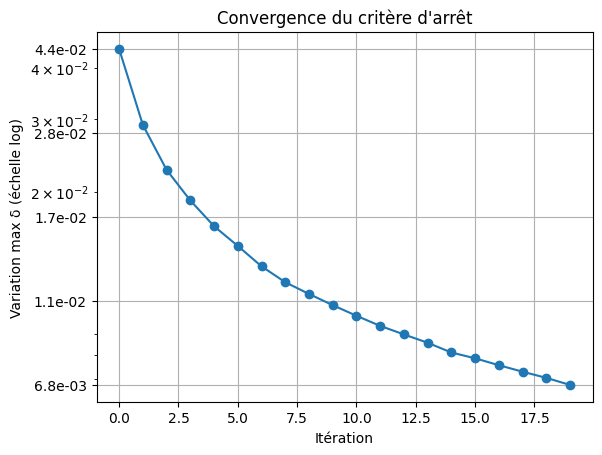

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from utils_contrib import algo_sousgradient_projete_residus
# Petit test
# --- Exemple jouet ---
np.random.seed(0)
n, d, K = 15, 5, 3
X = np.random.randn(n, d)
y = np.random.randn(n)
f_x = np.random.randn(n)
r = np.abs(y - f_x)

pi_opt, mu, F, history = algo_sousgradient_projete_residus(r, X, K=K)

history = np.array(history)  # liste des δ convertie en array


plt.plot(history, marker='o', label='δ max par itération')
plt.yscale("log")
plt.xlabel("Itération")
plt.ylabel("Variation max δ (échelle log)")
plt.title("Convergence du critère d'arrêt")
plt.grid(True)

# Définir manuellement les ticks de l'axe Y
delta_min = history.min()
delta_max = history.max()

# Par exemple on prend 5 valeurs logarithmique entre min et max
yticks = np.logspace(np.log10(delta_min), np.log10(delta_max), num=5)
plt.yticks(yticks, [f"{v:.1e}" for v in yticks])  # labels en notation scientifique

plt.show()

Convergence atteinte en 20 itérations (variation=4.76e-03).
K=2, log-likelihood = -1582.2389
K=3, log-likelihood = -407.2099
K=4, log-likelihood = -158.4951
K=5, log-likelihood = -144.9483
K=7, log-likelihood = -47.8047
K=10, log-likelihood = -15.4847


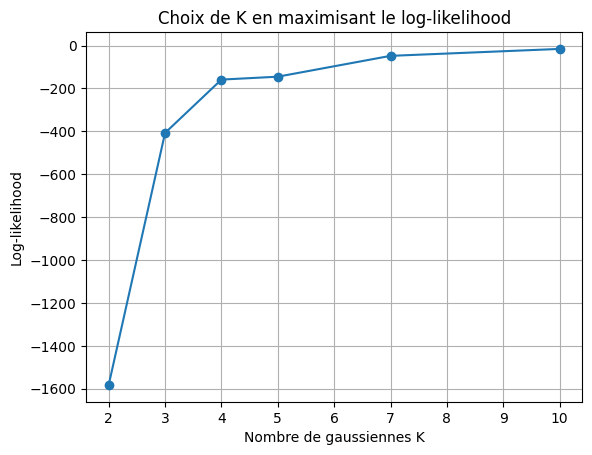

In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

n, d = 10, 5
X = np.random.rand(n, d) * 100  # covariables brutes

# Standardisation pour l'algo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Coefficients vrais
beta_true = np.array([1.5, -2.0, 0.5, 0.0, 1.0])

# Variable réponse Y
y = X @ beta_true + np.random.randn(n) * 5  # Y = Xβ + bruit

# Modèle prédictif (on peut utiliser une régression linéaire)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Résidus
r = np.abs(y - y_pred)

import numpy as np
from scipy.stats import norm

# Supposons que r et X soient déjà définis
# r = y - f(X)
# X_scaled = standardized X

K_values = [2, 3, 4, 5,7,10]
log_likelihoods = []

for K in K_values:
    pi_opt, mu, F, _ = algo_sousgradient_projete_residus(r, X_scaled, K=K)

    # Log-likelihood approximatif
    Z = np.sum(pi_opt * F, axis=1)
    logL = np.sum(np.log(Z))
    log_likelihoods.append(logL)
    print(f"K={K}, log-likelihood = {logL:.4f}")

# Visualisation
import matplotlib.pyplot as plt

plt.plot(K_values, log_likelihoods, marker='o')
plt.xlabel("Nombre de gaussiennes K")
plt.ylabel("Log-likelihood")
plt.title("Choix de K en maximisant le log-likelihood")
plt.grid(True)
plt.show()


Convergence atteinte en 20 itérations (variation=4.76e-03).


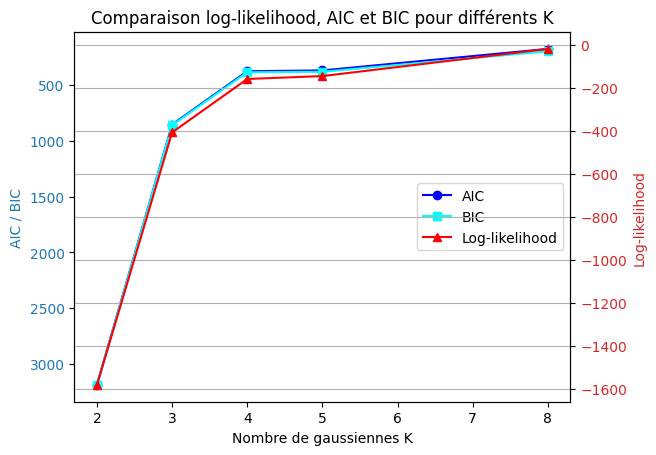

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que pi_opt, F, r, X_scaled soient déjà calculés pour différents K
K_values = [2, 3, 4, 5,8]
log_likelihoods = []
AIC_values = []
BIC_values = []

for K in K_values:
    pi_opt, mu, F, _ = algo_sousgradient_projete_residus(r, X_scaled, K=K)
    Z = np.sum(pi_opt * F, axis=1)
    logL = np.sum(np.log(Z))
    log_likelihoods.append(logL)

    p = len(r) * (K-1)
    AIC_values.append(2*p - 2*logL)
    BIC_values.append(np.log(len(r))*p - 2*logL)

# Plot
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Nombre de gaussiennes K")
ax1.set_ylabel("AIC / BIC", color=color)
ax1.plot(K_values, AIC_values, marker='o', label='AIC', color='blue')
ax1.plot(K_values, BIC_values, marker='s', label='BIC', color='cyan')
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_yaxis()  # AIC/BIC : plus petit = mieux

# Axe secondaire pour log-likelihood
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Log-likelihood", color=color)
ax2.plot(K_values, log_likelihoods, marker='^', label='Log-likelihood', color='red')
ax2.tick_params(axis='y', labelcolor=color)

# Légende combinée
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right')

plt.title("Comparaison log-likelihood, AIC et BIC pour différents K")
plt.grid(True)
plt.show()


In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

np.random.seed(0)
n, d = 300, 5  # observations et covariables
X = np.random.rand(n, d) * 100
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Génération d'une variable réponse Y
beta_true = np.array([1.5, -2.0, 0.5, 0.0, 1.0])
y = X @ beta_true + np.random.randn(n) * 5

# Modèle prédictif
model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Résidus
r = np.abs(y - y_pred)


In [50]:
from sklearn.cluster import KMeans

def centres_gaussiennes_clustering(r, K):
    r_reshaped = r.reshape(-1, 1)
    kmeans = KMeans(n_clusters=K, random_state=0).fit(r_reshaped)
    mu = np.sort(kmeans.cluster_centers_.flatten())
    return mu
from scipy.stats import norm

def generer_F_gaussiennes_r(r, mu, sigma=1.0):
    n, K = len(r), len(mu)
    F = np.zeros((n, K))
    for k in range(K):
        F[:, k] = norm.pdf(r, loc=mu[k], scale=sigma)
    return F
from scipy.spatial.distance import cdist

def projection_simplexe(v):
    n = len(v)
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    m = np.arange(1, n+1)
    cond = u - (cssv - 1)/m > 0
    if not np.any(cond):
        return np.full(n, 1.0/n)
    rho = np.nonzero(cond)[0][-1]
    theta = (cssv[rho]-1)/(rho+1)
    return np.maximum(v - theta, 0)

def algo_sousgradient_projete_residus(r, X, K=3, sigma=1.0,
                                      lambda_pen=0.1, eta0=0.1, T=100, tol=1e-5):
    n, d = X.shape
    mu = centres_gaussiennes_clustering(r, K)
    F = generer_F_gaussiennes_r(r, mu, sigma)
    pi = np.full((n, K), 1/K)

    dist = cdist(X, X, metric='euclidean')
    np.fill_diagonal(dist, np.inf)
    W = 1 / dist

    history_delta = []

    for t in range(T):
        eta_t = eta0 / np.sqrt(t+1)
        pi_old = pi.copy()

        for i in range(n):
            Z_i = np.dot(pi[i], F[i])
            g_lisse = -F[i]/Z_i

            diff = pi[i] - pi
            g_pen = (W[i][:, None]*np.sign(diff)).sum(axis=0)/lambda_pen

            y = pi[i] - eta_t*(g_lisse+g_pen)
            pi[i] = projection_simplexe(y)

        delta = np.max(np.sum(np.abs(pi - pi_old), axis=1))
        history_delta.append(delta)
        if delta < tol:
            break

    return pi, mu, F, history_delta


In [52]:
np.random.seed(0)
n, d = 20, 2
X = np.random.rand(n, d)  # features
R = X[:, 0] + 2*X[:, 1] + np.random.randn(n)  # résidus simulés

# Liste de lambda à tester
lambda_list = [10 ** i for i in range(8, -8, -1)]
best_lambda = None
best_r2 = -np.inf

for lam in lambda_list:
    pi, mu, F, _ = algo_sousgradient_projete_residus(R, X, K=3, lambda_pen=lam)
    r_hat = np.sum(pi * mu, axis=1)
    r2 = 1 - np.sum((R - r_hat)**2) / np.sum((R - np.mean(R))**2)
    print(f"lambda={lam}, R²={r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        best_lambda = lam

print("Meilleur lambda_pen =", best_lambda)


lambda=100000000, R²=0.8525
lambda=10000000, R²=0.8525
lambda=1000000, R²=0.8525
lambda=100000, R²=0.8524
lambda=10000, R²=0.8520
lambda=1000, R²=0.8493
lambda=100, R²=0.8167
lambda=10, R²=0.0278
lambda=1, R²=-0.4846
lambda=0.1, R²=-0.5287
lambda=0.01, R²=-0.4864
lambda=0.001, R²=-0.4864
lambda=0.0001, R²=-0.4864
lambda=1e-05, R²=-0.4864
lambda=1e-06, R²=-0.4864
lambda=1e-07, R²=-0.4864
Meilleur lambda_pen = 100000000


[1.0083568  0.11637223 0.6510445  0.37354887] [np.float64(0.1613846620773852), np.float64(0.06925599920592866), np.float64(0.0891237796431143), np.float64(0.07737040915850511)]


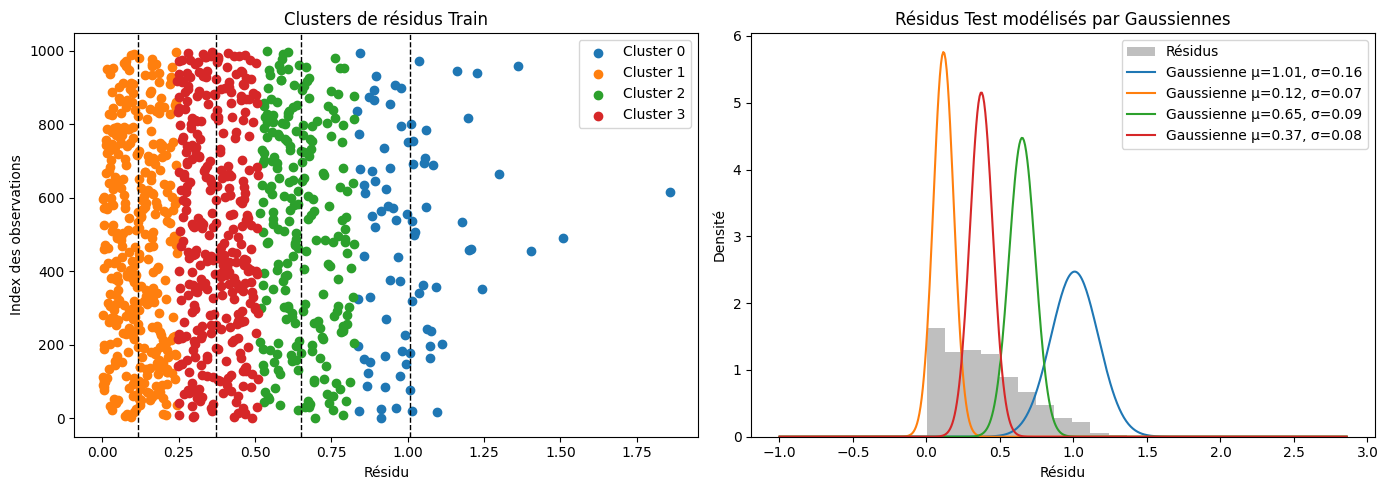

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import norm

# Données exemple
X = np.random.rand(1000, 2)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(1000)*0.5

# Modèle de régression
model = LinearRegression()
model.fit(X, y)
y_pred_train = model.predict(X)

# Résidus
residuals_train = np.abs(y - y_pred_train)

# KMeans sur les résidus du train
k = 4
residuals_train_reshaped = residuals_train.reshape(-1, 1)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_train = kmeans.fit_predict(residuals_train_reshaped)
centers = kmeans.cluster_centers_.flatten()
stds = [residuals_train[clusters_train==i].std() for i in range(k)]
print(centers,stds)

# Création des plots côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# ---- Plot 1 : clusters train ----
for cluster in range(k):
    axes[0].scatter(residuals_train[clusters_train==cluster],
                    np.where(clusters_train==cluster)[0],
                    label=f'Cluster {cluster}')
# Centres affichés
for c in centers:
    axes[0].axvline(x=c, color='black', linestyle='--', linewidth=1)

axes[0].set_xlabel('Résidu')
axes[0].set_ylabel('Index des observations')
axes[0].set_title('Clusters de résidus Train')
axes[0].legend()

# ---- Plot 2 : histogramme test + gaussiennes ----
axes[1].hist(residuals_train, bins=15, density=True, alpha=0.5, color='gray', label='Résidus')

x_vals = np.linspace(residuals_train.min()-1, residuals_train.max()+1, 500)
for mu, sigma in zip(centers, stds):
    axes[1].plot(x_vals, norm.pdf(x_vals, mu, sigma), label=f'Gaussienne μ={mu:.2f}, σ={sigma:.2f}')

axes[1].set_xlabel('Résidu')
axes[1].set_ylabel('Densité')
axes[1].set_title('Résidus Test modélisés par Gaussiennes')
axes[1].legend()

plt.tight_layout()
plt.show()


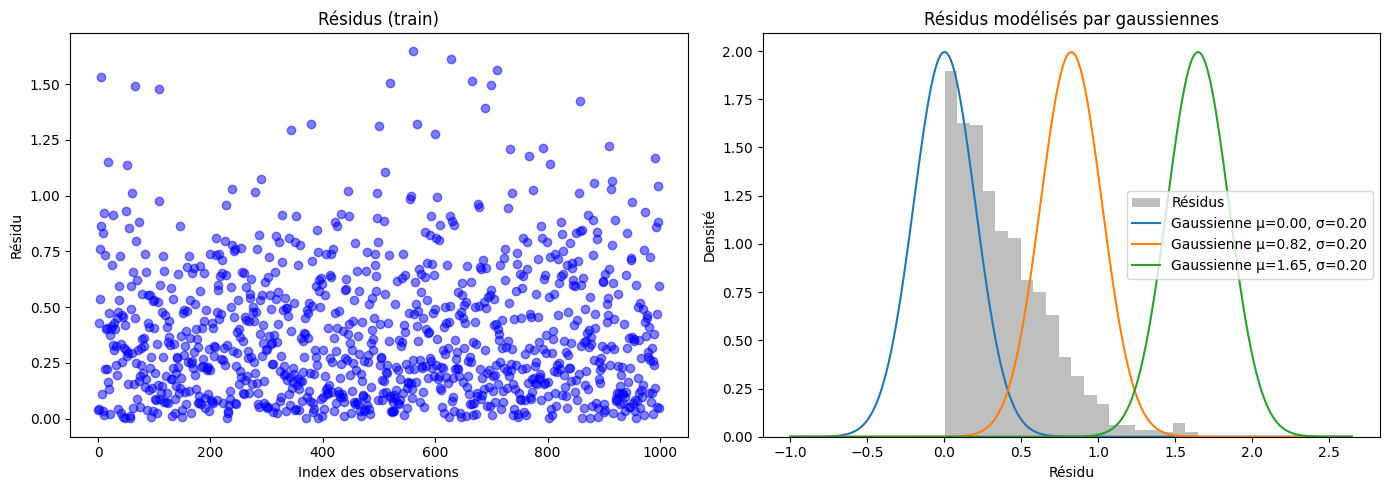

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# ---- Définition de ta fonction ----
def generer_F_gaussiennes_residus_gmm(r, K=3):
    r = np.array(r).reshape(-1, 1)
    n = len(r)

    gmm = GaussianMixture(n_components=min(K, len(np.unique(r))), random_state=42).fit(r)
    mu = gmm.means_.flatten()
    stds = np.sqrt(gmm.covariances_.flatten())

    F = np.zeros((n, len(mu)))
    for k in range(len(mu)):
        F[:, k] = norm.pdf(r[:, 0], loc=mu[k], scale=stds[k])

    return F, mu

# ---- Données exemple ----
X = np.random.rand(1000, 2)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(1000)*0.5

# Modèle de régression
model = LinearRegression()
model.fit(X, y)
y_pred_train = model.predict(X)

# Résidus
residuals_train = np.abs(y - y_pred_train)

# ---- Utilisation de ton algo ----
K = 3
sigma = 0.2
F, mu = generer_F_gaussiennes_residus(residuals_train, K=K, sigma=sigma)

# ---- Création des plots côte à côte ----
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot 1 : résidus
axes[0].scatter(np.arange(len(residuals_train)), residuals_train, alpha=0.5, color="blue")
axes[0].set_xlabel("Index des observations")
axes[0].set_ylabel("Résidu")
axes[0].set_title("Résidus (train)")

# Plot 2 : histogramme + gaussiennes générées
axes[1].hist(residuals_train, bins=20, density=True, alpha=0.5, color='gray', label='Résidus')
x_vals = np.linspace(residuals_train.min()-1, residuals_train.max()+1, 500)

for k in range(K):
    axes[1].plot(x_vals, norm.pdf(x_vals, loc=mu[k], scale=sigma),
                 label=f'Gaussienne μ={mu[k]:.2f}, σ={sigma:.2f}')

axes[1].set_xlabel("Résidu")
axes[1].set_ylabel("Densité")
axes[1].set_title("Résidus modélisés par gaussiennes")
axes[1].legend()

plt.tight_layout()
plt.show()


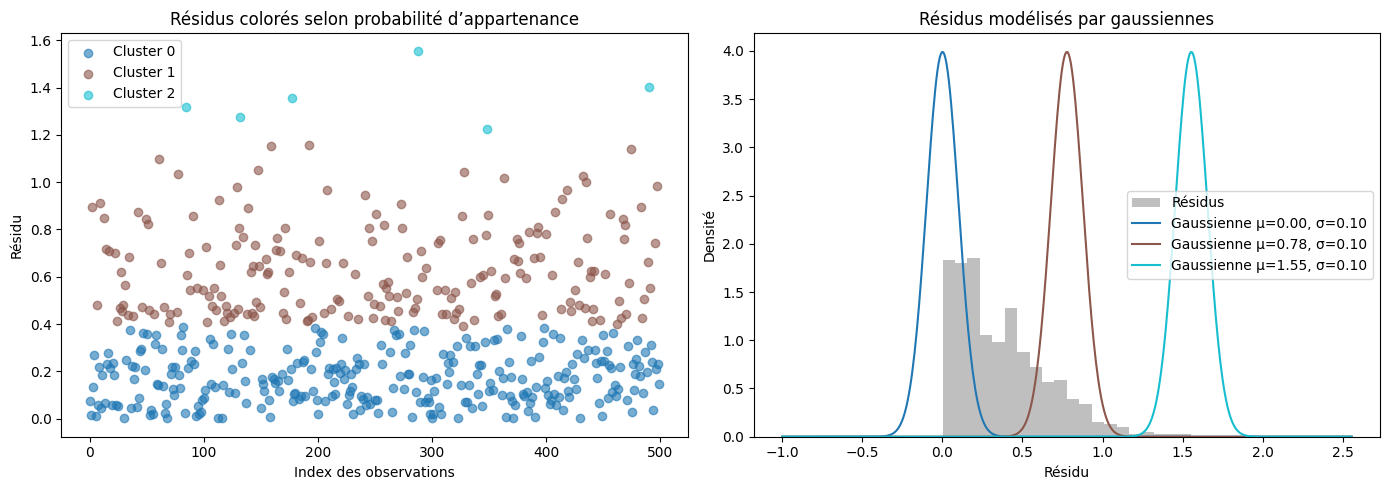

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# ---- Définition de ta fonction ----
def generer_F_gaussiennes_residus_gmm(r, K=3):
    r = np.array(r).reshape(-1, 1)
    n = len(r)

    gmm = GaussianMixture(n_components=min(K, len(np.unique(r))), random_state=42).fit(r)
    mu = gmm.means_.flatten()
    stds = np.sqrt(gmm.covariances_.flatten())

    F = np.zeros((n, len(mu)))
    for k in range(len(mu)):
        F[:, k] = norm.pdf(r[:, 0], loc=mu[k], scale=stds[k])

    return F, mu
# ---- Données ----
np.random.seed(0)
X = np.random.rand(500, 2)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(500)*0.5

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

residuals = np.abs(y - y_pred)

# ---- Algo ----
K = 3
sigma = 0.1
F, mu = generer_F_gaussiennes_residus(residuals, K=K, sigma=sigma)

# Probabilités d’appartenance normalisées
P = F / F.sum(axis=1, keepdims=True)

# Cluster le plus probable pour chaque point
clusters = np.argmax(P, axis=1)

# Palette de couleurs
colors = plt.cm.tab10(np.linspace(0, 1, K))

# ---- Plots ----
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot 1 : résidus colorés selon cluster dominant
for k in range(K):
    mask = clusters == k
    axes[0].scatter(np.arange(len(residuals))[mask], residuals[mask],
                    color=colors[k], alpha=0.6, label=f'Cluster {k}')
axes[0].set_xlabel("Index des observations")
axes[0].set_ylabel("Résidu")
axes[0].set_title("Résidus colorés selon probabilité d’appartenance")
axes[0].legend()

# Plot 2 : histogramme + gaussiennes
axes[1].hist(residuals, bins=20, density=True, alpha=0.5, color='gray', label='Résidus')
x_vals = np.linspace(residuals.min()-1, residuals.max()+1, 500)
for k in range(K):
    axes[1].plot(x_vals, norm.pdf(x_vals, loc=mu[k], scale=sigma),
                 color=colors[k], label=f'Gaussienne μ={mu[k]:.2f}, σ={sigma:.2f}')
axes[1].set_xlabel("Résidu")
axes[1].set_ylabel("Densité")
axes[1].set_title("Résidus modélisés par gaussiennes")
axes[1].legend()

plt.tight_layout()
plt.show()


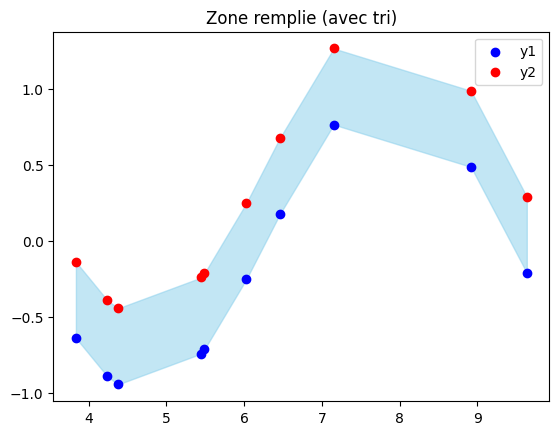

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Données
np.random.seed(0)
x = np.random.rand(10) * 10  # valeurs non triées
y1 = np.sin(x)
y2 = y1 + 0.5



# Tri des indices
indices = np.argsort(x)

# Plot avec tri
plt.fill_between(x[indices], y1[indices], y2[indices], color='skyblue', alpha=0.5)
plt.scatter(x[indices], y1[indices], color='blue', label='y1')
plt.scatter(x[indices], y2[indices], color='red', label='y2')
plt.title("Zone remplie (avec tri)")
plt.legend()
plt.show()